In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn import metrics
%matplotlib inline

In [2]:
heart=pd.read_csv("heart.csv")

In [3]:
heart.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
heart.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
corr=heart.corr()
corr

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


<AxesSubplot:>

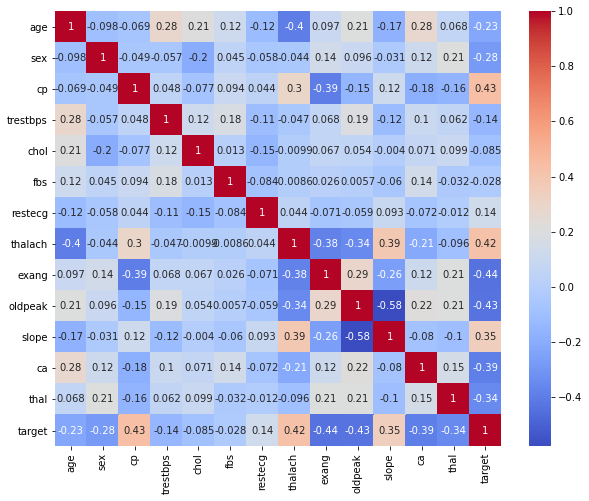

In [6]:
import seaborn as sns
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [7]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
col=heart.columns
col

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [9]:
X=heart[col[0:-1]].values

In [10]:
y=heart[col[-1:]].values.ravel()

In [11]:
# SVM Linear

In [12]:
from sklearn.model_selection import train_test_split 

In [13]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=77)

In [14]:
from sklearn import svm
from sklearn.svm import SVC
clf=svm.SVC(kernel="linear",random_state=0)
clf.fit(X_train,y_train)

SVC(kernel='linear', random_state=0)

In [15]:
clf.support_vectors_

array([[59.,  1.,  2., ...,  1.,  1.,  1.],
       [77.,  1.,  0., ...,  2.,  3.,  2.],
       [42.,  1.,  0., ...,  1.,  0.,  1.],
       ...,
       [64.,  1.,  3., ...,  1.,  0.,  3.],
       [42.,  0.,  0., ...,  1.,  0.,  2.],
       [53.,  1.,  0., ...,  2.,  0.,  3.]])

In [16]:
clf.intercept_

array([2.75667636])

In [17]:
clf.coef_

array([[ 0.00488016, -1.1486033 ,  0.69889524, -0.01508595, -0.00249161,
        -0.1377952 ,  0.23376962,  0.01518084, -0.62105539, -0.54131525,
         0.23700458, -0.36683973, -0.77625673]])

In [18]:
y_pred=clf.predict(X_test)
y_pred

array([1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1], dtype=int64)

In [19]:
from sklearn import metrics
cm=metrics.confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n ", cm)
ac=metrics.accuracy_score(y_test, y_pred)
print("Accuracy score is: ", ac)
pr=metrics.precision_score(y_test,y_pred)
print("Precision score is; ", pr)
rec=metrics.recall_score(y_test, y_pred)
print("Recall score is: ", rec)

Confusion matrix:
  [[22  5]
 [ 2 32]]
Accuracy score is:  0.8852459016393442
Precision score is;  0.8648648648648649
Recall score is:  0.9411764705882353


In [20]:
# SVM RBF

In [21]:
from sklearn.svm import SVC
clf2=SVC(kernel="rbf", random_state=0)
clf2.fit(X_train,y_train)

SVC(random_state=0)

In [22]:
y_pred=clf2.predict(X_test)

In [23]:
from sklearn import metrics
cm=metrics.confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n ", cm)
ac=metrics.accuracy_score(y_test, y_pred)
print("Accuracy score is: ", ac)
pr=metrics.precision_score(y_test,y_pred)
print("Precision score is; ", pr)
rec=metrics.recall_score(y_test, y_pred)
print("Recall score is: ", rec)

Confusion matrix:
  [[13 14]
 [ 4 30]]
Accuracy score is:  0.7049180327868853
Precision score is;  0.6818181818181818
Recall score is:  0.8823529411764706


In [24]:
# LogisticRegression

In [25]:
from sklearn.linear_model import LogisticRegression
log_clf=LogisticRegression(solver='lbfgs',class_weight='balanced', max_iter=10000)
log_clf.fit(X_train, y_train)
y_pred=log_clf.predict(X_test)
from sklearn import metrics
cm=metrics.confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n ", cm)
ac=metrics.accuracy_score(y_test, y_pred)
print("Accuracy score is: ", ac)
pr=metrics.precision_score(y_test,y_pred)
print("Precision score is; ", pr)
rec=metrics.recall_score(y_test, y_pred)
print("Recall score is: ", rec)

Confusion matrix:
  [[22  5]
 [ 2 32]]
Accuracy score is:  0.8852459016393442
Precision score is;  0.8648648648648649
Recall score is:  0.9411764705882353


In [26]:
# DecisionTree

In [27]:
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train,y_train)
y_pred=tree_clf.predict(X_test)

from sklearn import metrics
cm=metrics.confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n ", cm)
ac=metrics.accuracy_score(y_test, y_pred)
print("Accuracy score is: ", ac)
pr=metrics.precision_score(y_test,y_pred)
print("Precision score is; ", pr)
rec=metrics.recall_score(y_test, y_pred)
print("Recall score is: ", rec)
print("Classification Report for Decision Tree Classifier:""\n",metrics.classification_report(y_test,y_pred))

Confusion matrix:
  [[20  7]
 [ 8 26]]
Accuracy score is:  0.7540983606557377
Precision score is;  0.7878787878787878
Recall score is:  0.7647058823529411
Classification Report for Decision Tree Classifier:
               precision    recall  f1-score   support

           0       0.71      0.74      0.73        27
           1       0.79      0.76      0.78        34

    accuracy                           0.75        61
   macro avg       0.75      0.75      0.75        61
weighted avg       0.76      0.75      0.75        61



[Text(866.1976744186047, 1494.8999999999999, 'X[2] <= 0.5\ngini = 0.497\nsamples = 242\nvalue = [111, 131]'),
 Text(476.8953488372093, 1223.1, 'X[11] <= 0.5\ngini = 0.396\nsamples = 114\nvalue = [83, 31]'),
 Text(291.9767441860465, 951.3, 'X[12] <= 2.5\ngini = 0.499\nsamples = 52\nvalue = [25, 27]'),
 Text(155.72093023255815, 679.4999999999999, 'X[8] <= 0.5\ngini = 0.383\nsamples = 31\nvalue = [8, 23]'),
 Text(77.86046511627907, 407.6999999999998, 'X[7] <= 96.5\ngini = 0.18\nsamples = 20\nvalue = [2, 18]'),
 Text(38.93023255813954, 135.89999999999986, '\n  (...)  \n'),
 Text(116.79069767441861, 135.89999999999986, '\n  (...)  \n'),
 Text(233.58139534883722, 407.6999999999998, 'X[6] <= 0.5\ngini = 0.496\nsamples = 11\nvalue = [6, 5]'),
 Text(194.6511627906977, 135.89999999999986, '\n  (...)  \n'),
 Text(272.51162790697674, 135.89999999999986, '\n  (...)  \n'),
 Text(428.2325581395349, 679.4999999999999, 'X[9] <= 0.45\ngini = 0.308\nsamples = 21\nvalue = [17, 4]'),
 Text(389.302325581395

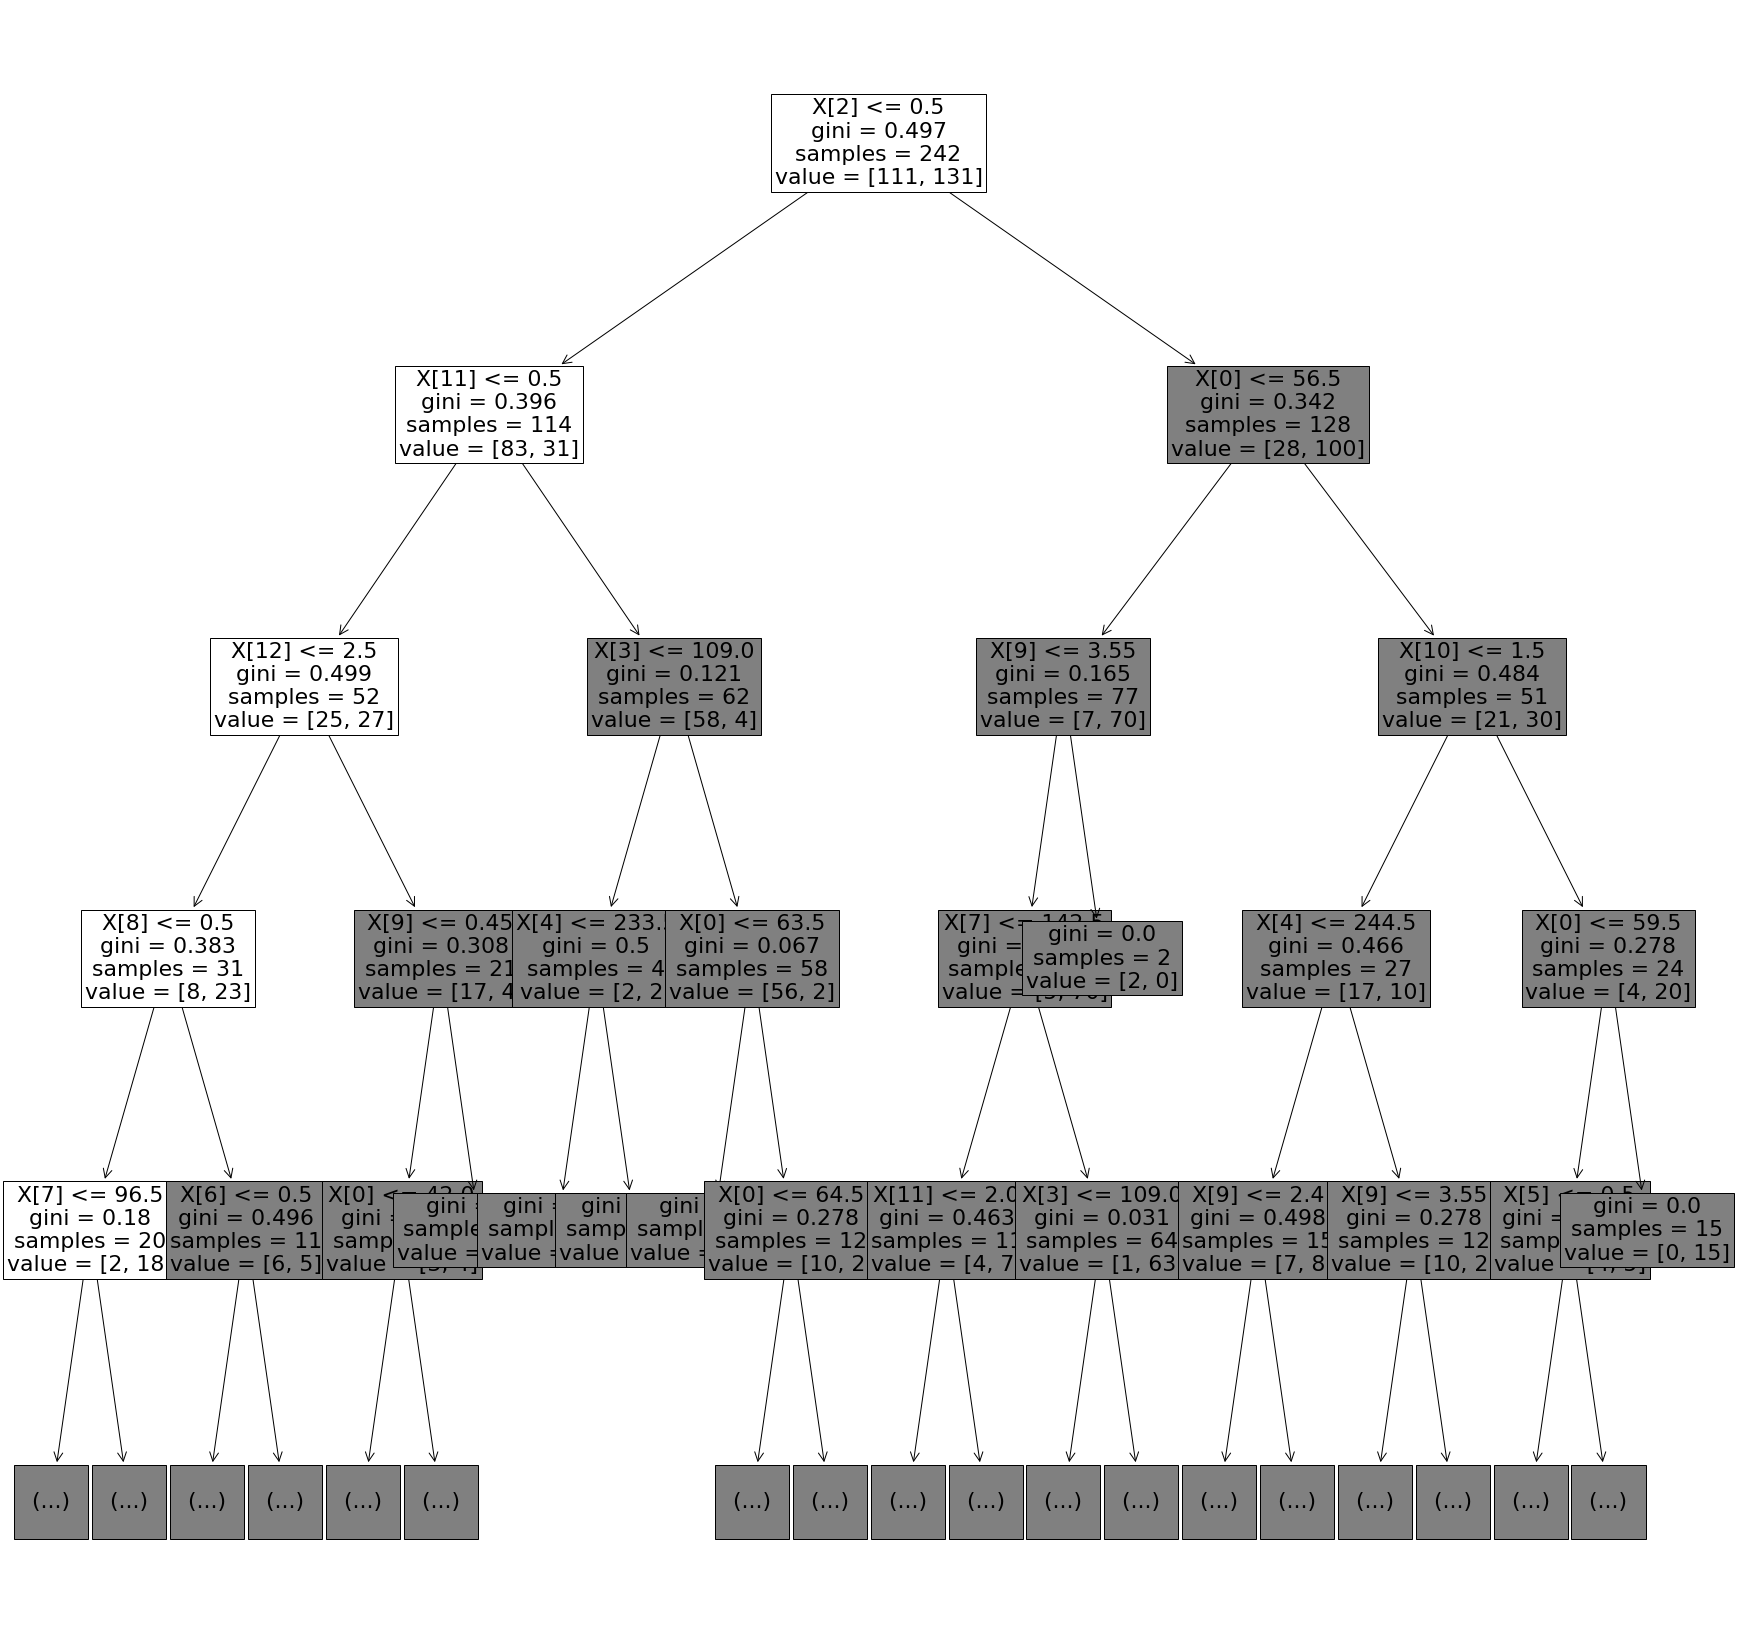

In [28]:
from sklearn import tree
fig, axes=plt.subplots(figsize=(30,30))
tree.plot_tree(tree_clf.fit(X_train, y_train),max_depth=4, fontsize=22)

In [29]:
# KNN

In [30]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=9, p=2)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
from sklearn import metrics
cm=metrics.confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n ", cm)
ac=metrics.accuracy_score(y_test, y_pred)
print("Accuracy score is: ", ac)
pr=metrics.precision_score(y_test,y_pred)
print("Precision score is; ", pr)
rec=metrics.recall_score(y_test, y_pred)
print("Recall score is: ", rec)

Confusion matrix:
  [[13 14]
 [ 4 30]]
Accuracy score is:  0.7049180327868853
Precision score is;  0.6818181818181818
Recall score is:  0.8823529411764706


In [31]:
# Naive_Bayes

In [32]:
from sklearn.naive_bayes import GaussianNB
clf=GaussianNB()
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
from sklearn import metrics
cm=metrics.confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n ", cm)
ac=metrics.accuracy_score(y_test, y_pred)
print("Accuracy score is: ", ac)
pr=metrics.precision_score(y_test,y_pred)
print("Precision score is; ", pr)
rec=metrics.recall_score(y_test, y_pred)
print("Recall score is: ", rec)

Confusion matrix:
  [[22  5]
 [ 3 31]]
Accuracy score is:  0.8688524590163934
Precision score is;  0.8611111111111112
Recall score is:  0.9117647058823529
